## Gym Members Exercise Dataset

This is the Kaggle Dataset with the overview of gym members exercise routines, physical attributes, and fitness metrics.
Here are the analysis I will check: 
- Nulls;
- Distribution of gender;
- Distribution of age;
- Distribution of age by gender;
- Distribution of workout type;
- Distribution of workout type (by gender);
- Distribution of experience level;
- Session duration;
- Session duration for each gender;
- Duration of each workout type session;
- Relation between session duration and experience level;
- Calories burned;
- Calories burned by gender;
- Relation between session duration and calories burned;
- Relation between calories burned and experience level;

#### Importing necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib

from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

#### Importing dataset

In [69]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [70]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

#### Replacing Experience Level (numbers) with more expressive string labels

In [71]:
df['Experience_Level'] = df['Experience_Level'].replace({1: 'Beginner', 2: 'Average', 3: 'Expert'})
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,Expert,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,Average,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,Average,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,Beginner,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,Beginner,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,Expert,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,Beginner,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,Expert,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,Average,37.74


#### Distribution of Gender between Males and Females

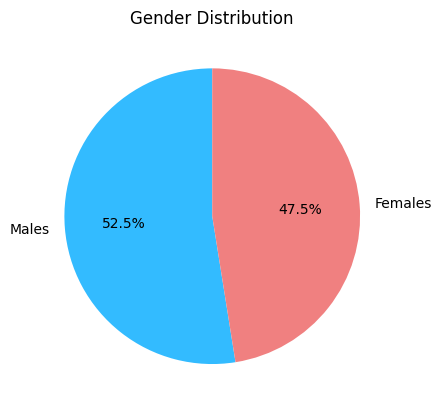

In [72]:
gender_distribution = df['Gender'].value_counts()
male_percentage = (df['Gender'].value_counts(normalize=True)['Male']) * 100
female_percentage = (df['Gender'].value_counts(normalize=True)['Female']) * 100

female_color = '#F08080'
male_color = '#33bbff'

plt.pie(gender_distribution, 
    colors=[male_color, female_color], 
    labels=["Males", "Females"], 
    autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

#### Distribution of Ages.

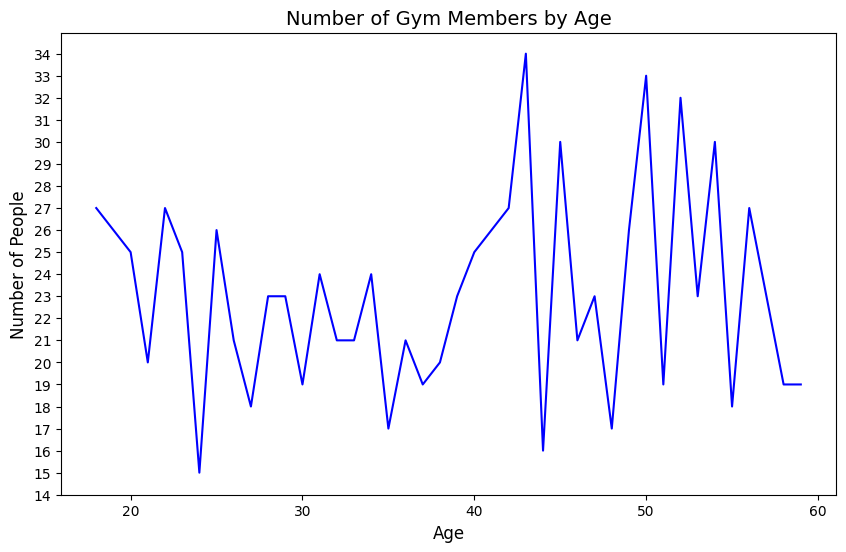

In [73]:
age_counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, color='b', linestyle='-', markersize=6)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of Gym Members by Age', fontsize=14)
plt.yticks(range(14, int(age_counts.max()) + 1, 1))
plt.show()


### Distribution of age by gender

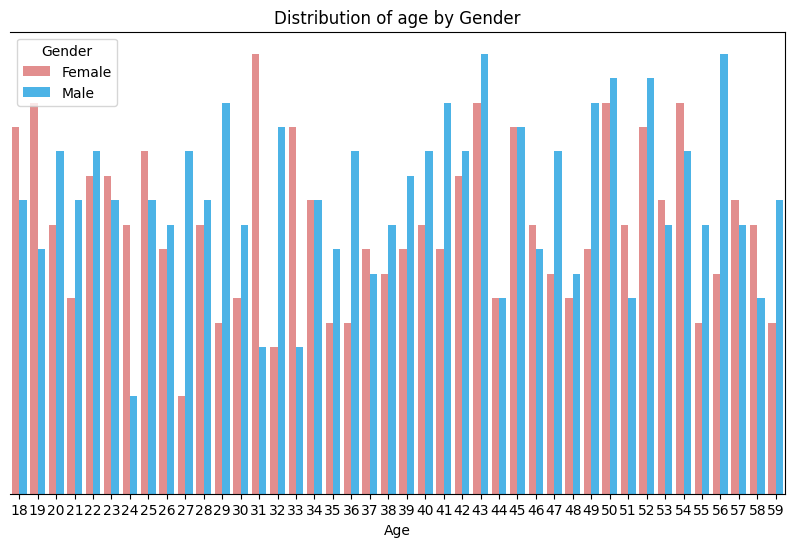

In [74]:
age_gender_count = df.groupby(['Age', 'Gender']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(x="Age", y="count", hue="Gender", data=age_gender_count, palette=[female_color, male_color])
plt.gca().get_yaxis().set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title("Distribution of age by Gender")
plt.xlabel("Age")
plt.show()

### Distribution of workout type

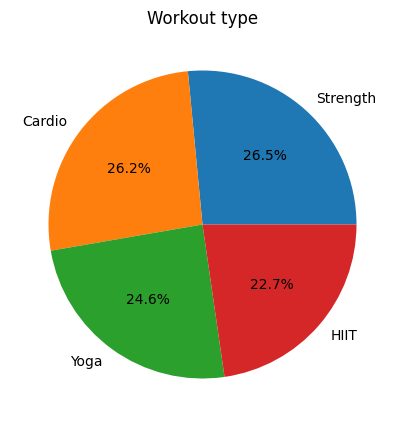

In [75]:
workout_count = df["Workout_Type"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(workout_count, labels=workout_count.index, autopct="%1.1f%%", startangle=0)
plt.title("Workout type")
plt.show()


### Distribution of workout type by gender

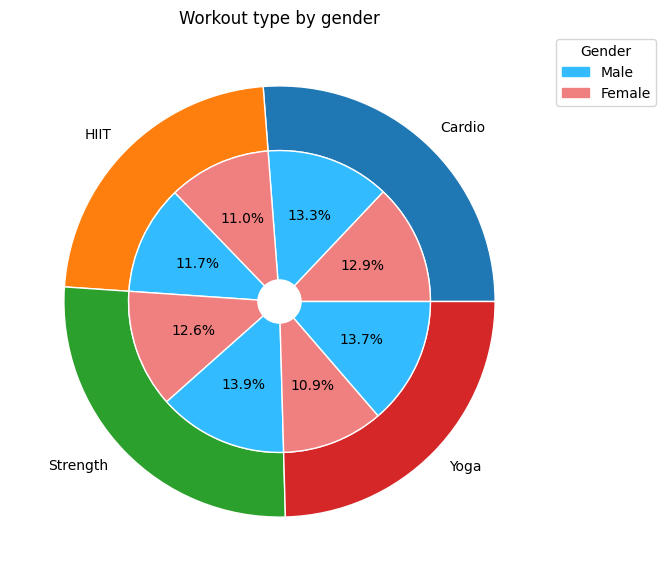

In [110]:
workout_by_gender = df.groupby(['Workout_Type', 'Gender']).size().unstack()

outer_circle_size = workout_by_gender.sum(axis=1)
workout_labels = workout_by_gender.index

inner_circle_size = workout_by_gender.values.flatten()
gender_labels = [f'{workout} - {gender}' for workout in workout_labels for gender in workout_by_gender.columns]

fig, ax = plt.subplots(figsize=(7,7))

ax.pie(outer_circle_size, labels=workout_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), autopct=None)

ax.pie(inner_circle_size, 
    colors=[female_color, male_color],
    radius=0.7, 
    wedgeprops=dict(width=0.6, edgecolor='w'), autopct='%.1f%%')

male_patch = mpatches.Patch(color=male_color, label="Male")
female_patch = mpatches.Patch(color=female_color, label="Female")

ax.legend(handles=[male_patch, female_patch], title="Gender", loc="upper left", fontsize=10, bbox_to_anchor=(1, 1))

plt.title("Workout type by gender")
plt.show()

### Distribution of experience level

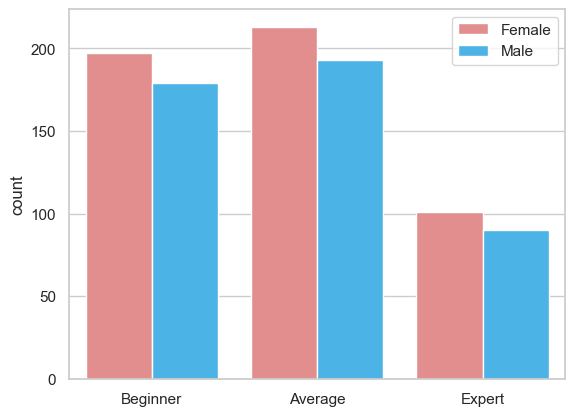

In [152]:
sns.set(style="whitegrid")
sns.countplot(data=df, 
    x='Experience_Level', hue='Gender', 
    palette=[female_color, male_color], 
    order=["Beginner", "Average", "Expert"])
plt.yticks(range(0,250,50))
plt.xlabel('')
plt.legend(['Female', 'Male'])
plt.show()


### Session Duration

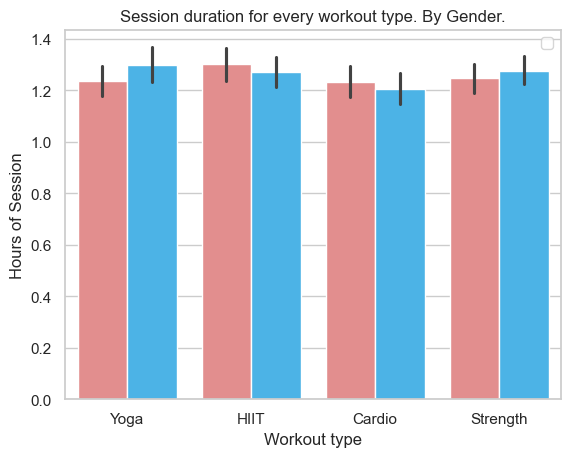

In [163]:
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=df, hue='Gender', palette=[female_color, male_color], )
plt.legend('')
plt.xlabel("Workout type")
plt.ylabel("Hours of Session")
plt.title('Session duration for every workout type. By Gender.')
plt.show()